In [ ]:
"""1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
3. Take a look at the data: explore it.
4. Think of a narrative, and pursue it.
5. Give a 15 mins presentation to your mentor during your next call.
In your quest, you might need to ask a bunch of other questions, such as:
● Can I count something interesting?
● Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
● Can I make a bar plot or a histogram?
● Can I compare two related quantities?
● Can I make a scatterplot?
● Can I make a time-series plot?
● Looking at the plots, what are some insights I can make?
● Can I see any correlations?
● Is there a hypothesis I can - and should - investigate further?
● What other questions are the insights leading me to ask?"""


In [ ]:
Take a look at the data: explore it.
- income data and some personal information. Lets try to predict income based on those factors and see which category is the best at predicting income

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("adult.csv")
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
(48842, 15)


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [4]:
selected_features = ["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]
correlation_matrix = df[selected_features].corr()

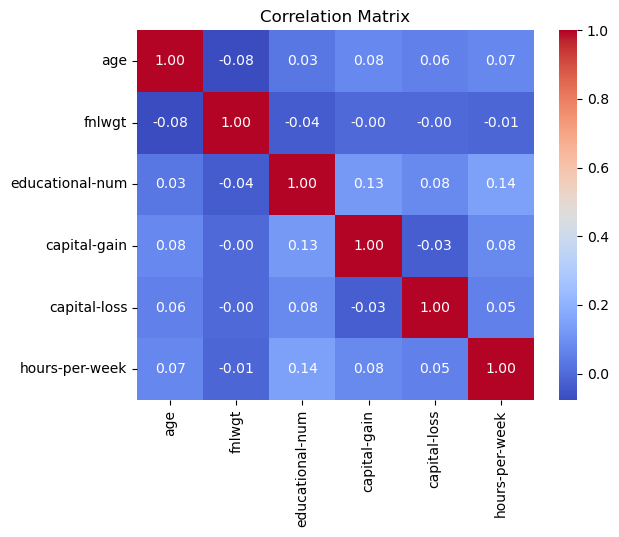

In [5]:

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# There Appears to be no significant correlations between the components of the dataset. so lets go with a model that can handle nonlinear relationships ---like a Decision tree

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_35736\3410063008.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


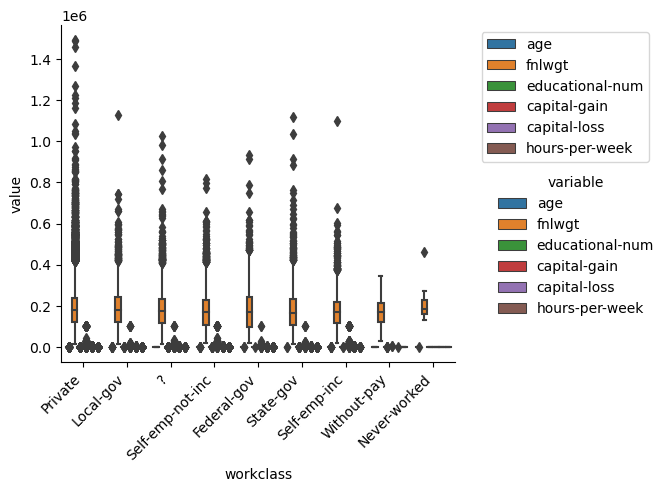

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_35736\3410063008.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


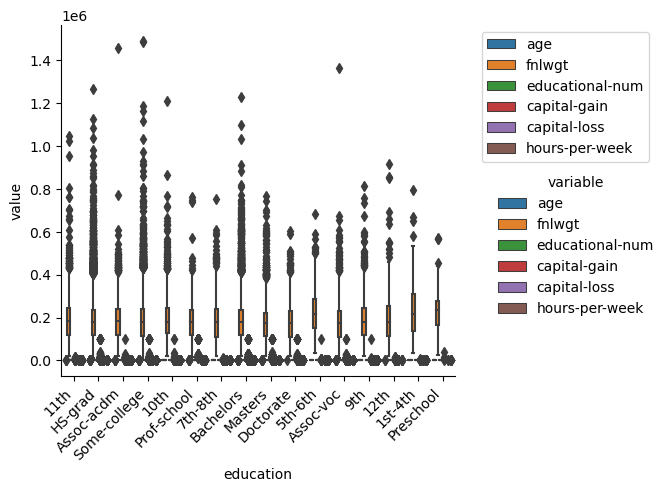

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_35736\3410063008.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


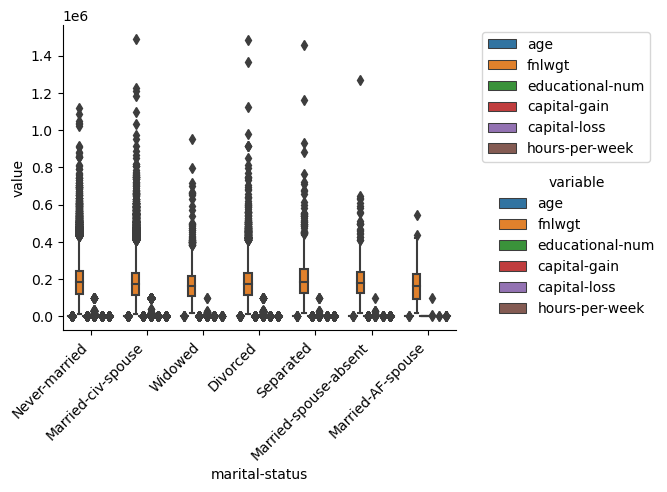

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_35736\3410063008.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


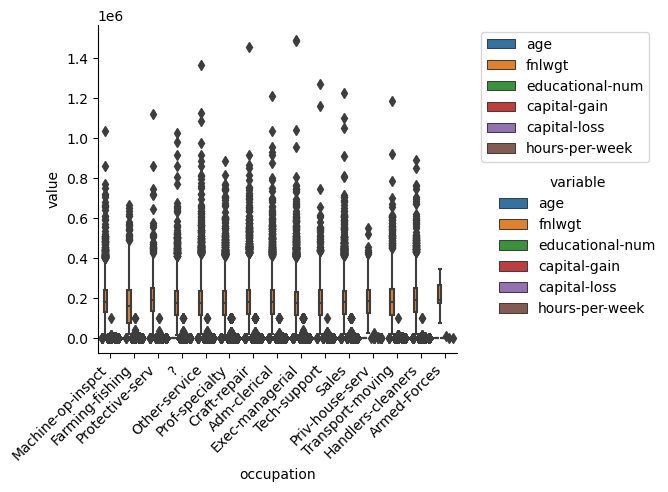

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_35736\3410063008.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


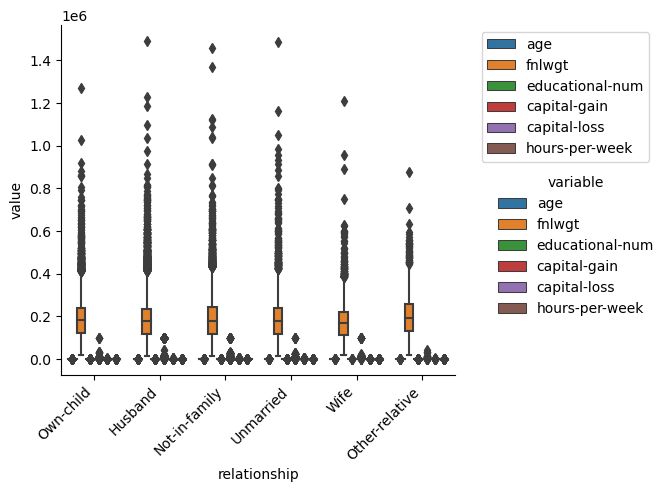

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_35736\3410063008.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


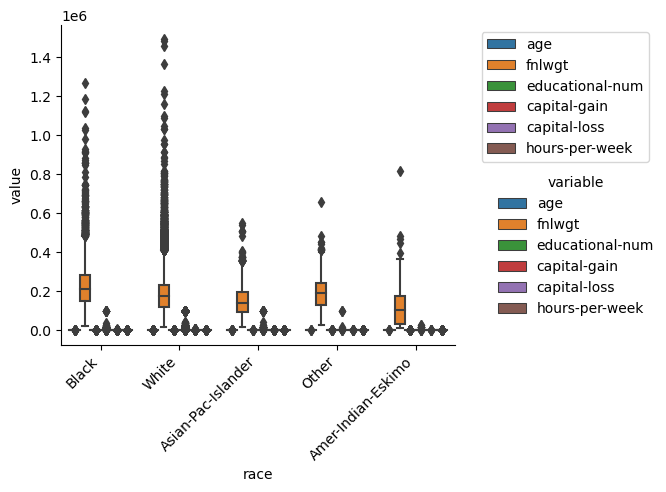

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_35736\3410063008.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


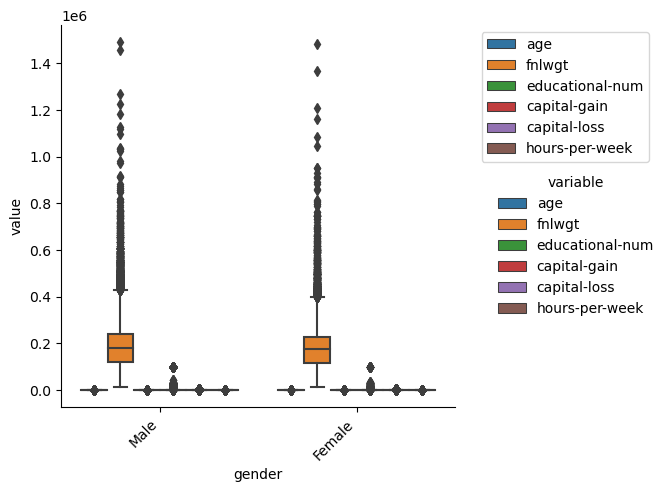

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_35736\3410063008.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


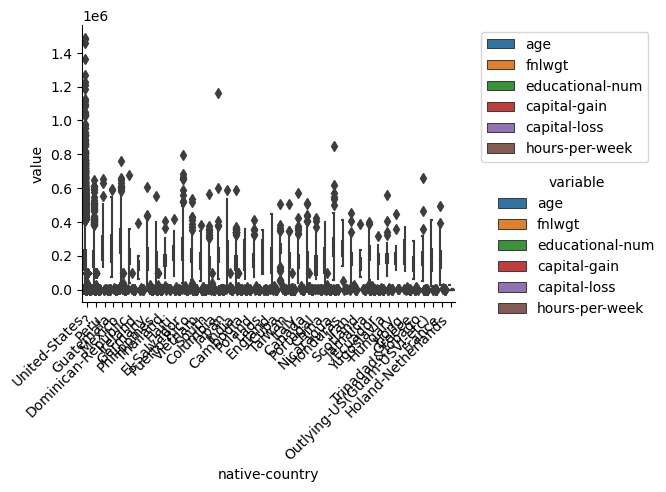

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_35736\3410063008.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


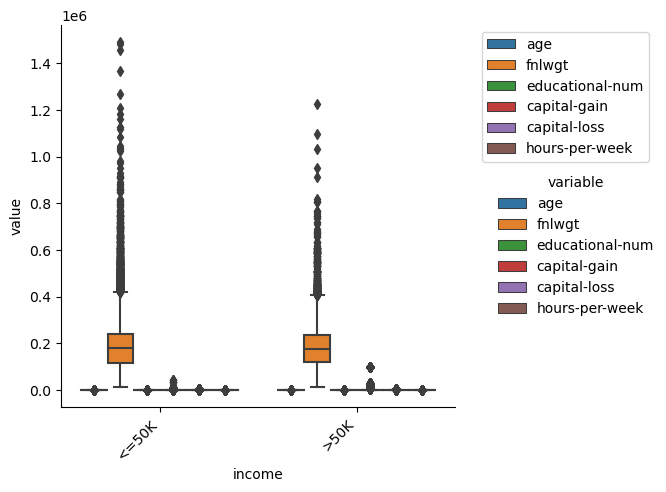

In [64]:
# lets take a look at box plot distributions for categorical features vs the  numerical features of the data set. 

y = ["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]
x = ["workclass","education","marital-status","occupation","relationship","race","gender","native-country","income"]

for category_feature in x:
    # Creating a FacetGrid for each categorical feature
    g = sns.catplot(x=category_feature, y='value', hue='variable', kind='box', data=pd.melt(df, id_vars=category_feature, value_vars=y))
    g.set_xticklabels(rotation=45, horizontalalignment='right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [34]:
#lets load and prep data for the model:
X = df.iloc[:, :13] 
y = df['income']

In [37]:
# we will need to account for the categorical features
# Encode categorical features using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

#Train and split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [39]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8240352134302386
Confusion Matrix:
 [[6576  903]
 [ 816 1474]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.88      0.88      7479
        >50K       0.62      0.64      0.63      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.76      0.76      9769
weighted avg       0.83      0.82      0.83      9769



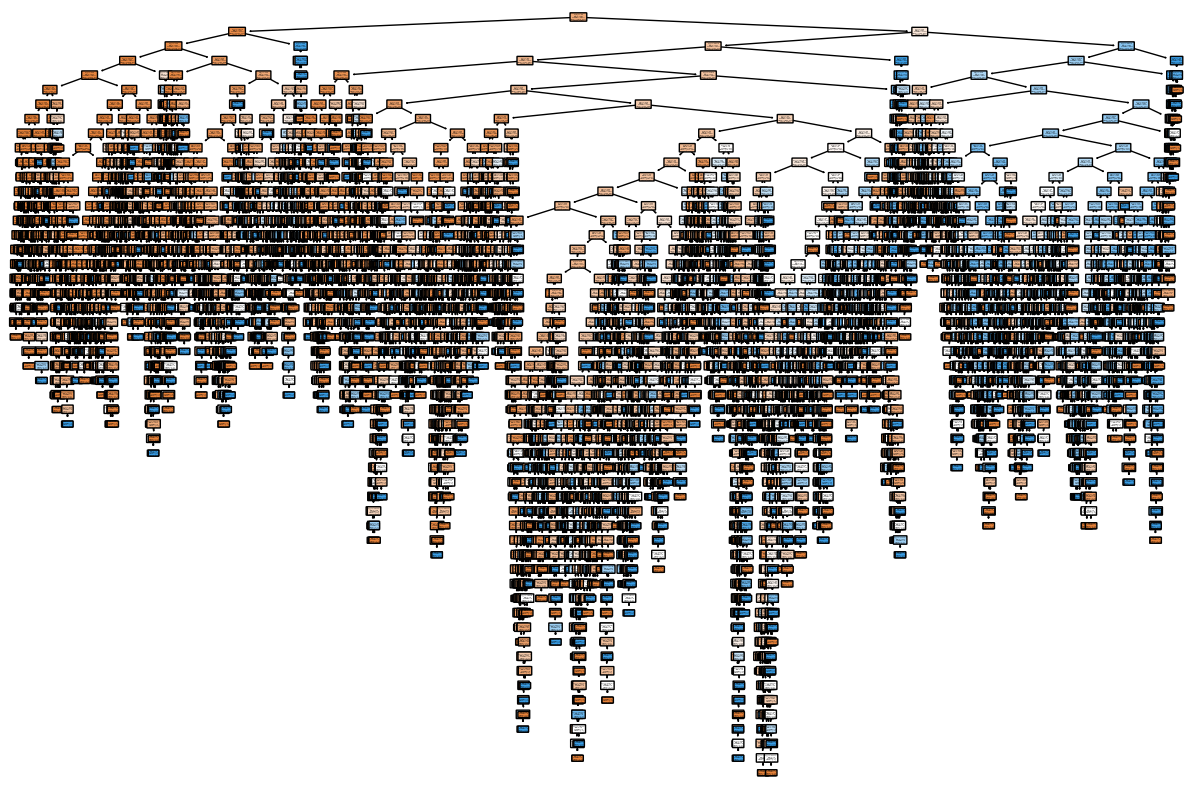

In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Convert the class names to a list
class_names_list = model.classes_.tolist()

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, class_names=class_names_list, rounded=True)
plt.show()

# this shows the complete tree. however a more granular view is on specific nodes

In [ ]:
Think of a narrative, and pursue it

In [ ]:
# From here, i want to see which categorical features are most influential for incomes


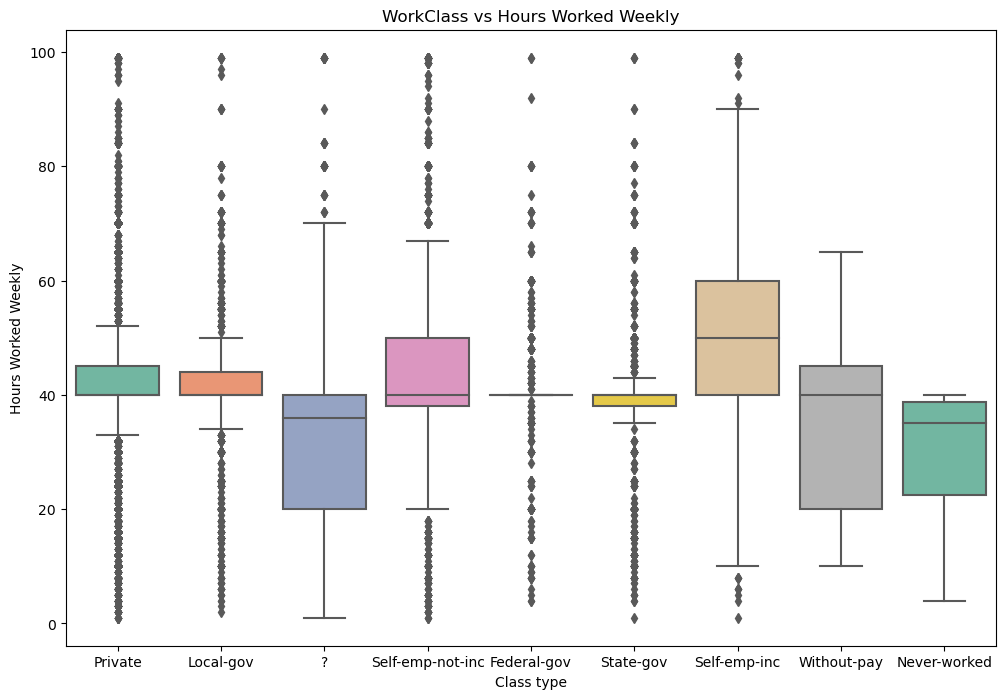

In [88]:
# Select relevant columns for the plot
plot_data = df[['workclass', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='workclass', y='hours-per-week', data=plot_data, palette='Set2')
plt.title('WorkClass vs Hours Worked Weekly')
plt.xlabel('Class type')
plt.ylabel('Hours Worked Weekly')
plt.show()

In [ ]:
- self employeed inviduals seem to thave the h largest distribution of time worked
- state gov has lowest spread and is expeced
- without pay 

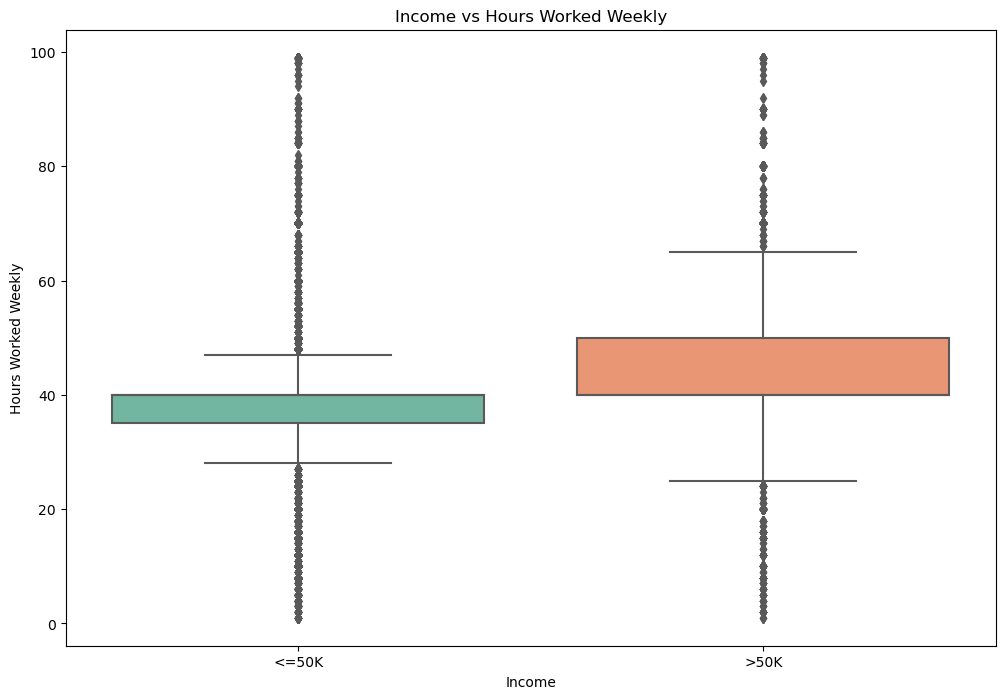

In [72]:
# Select relevant columns for the plot
plot_data = df[['income', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='income', y='hours-per-week', data=plot_data,order=['<=50K', '>50K'], palette='Set2')
plt.title('Income vs Hours Worked Weekly')
plt.xlabel('Income')
plt.ylabel('Hours Worked Weekly')
plt.show()

In [ ]:
-  workers that work over 40 hrs per week earn more.

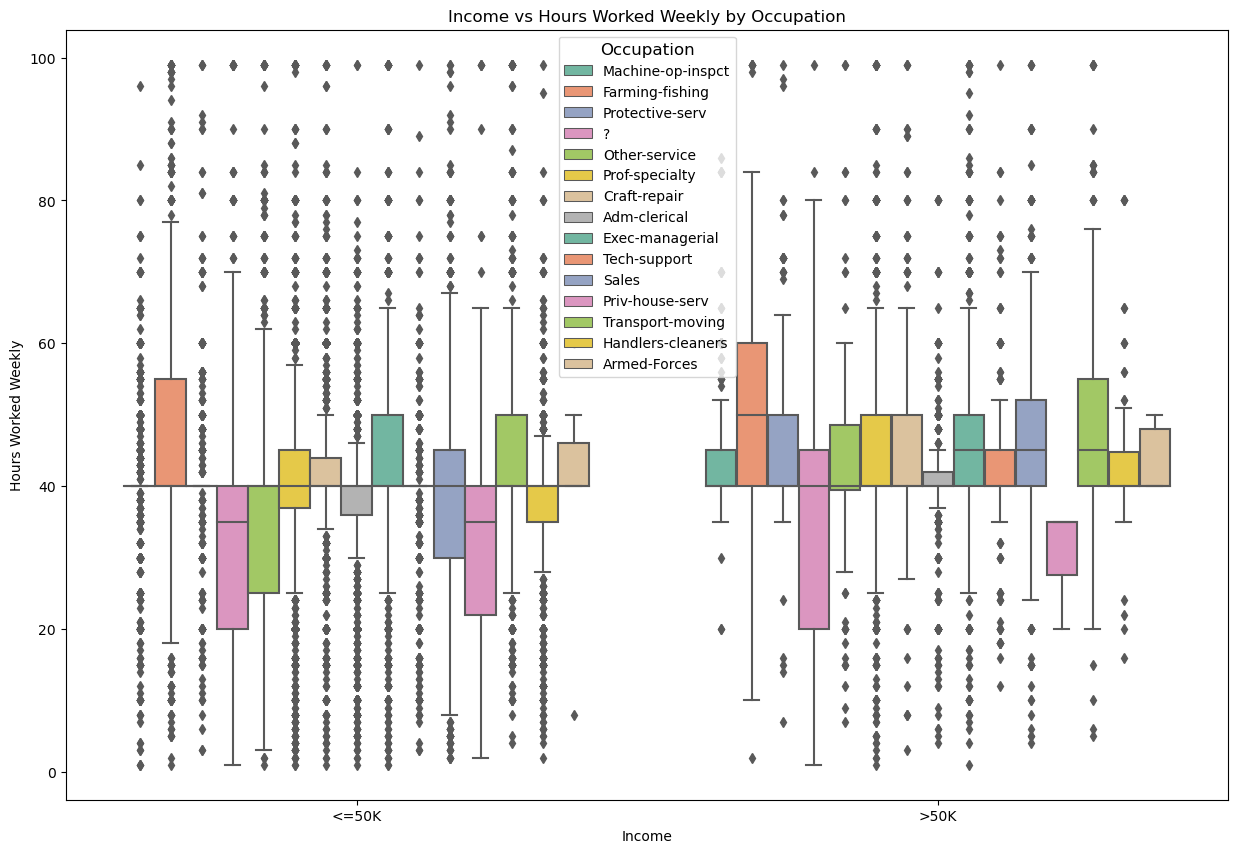

In [73]:
plot_data = df[['income', 'occupation', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='income', y='hours-per-week', hue='occupation', data=plot_data, order=['<=50K', '>50K'], palette='Set2')
plt.title('Income vs Hours Worked Weekly by Occupation')
plt.xlabel('Income')
plt.ylabel('Hours Worked Weekly')
plt.legend(title='Occupation', title_fontsize='12')
plt.show()

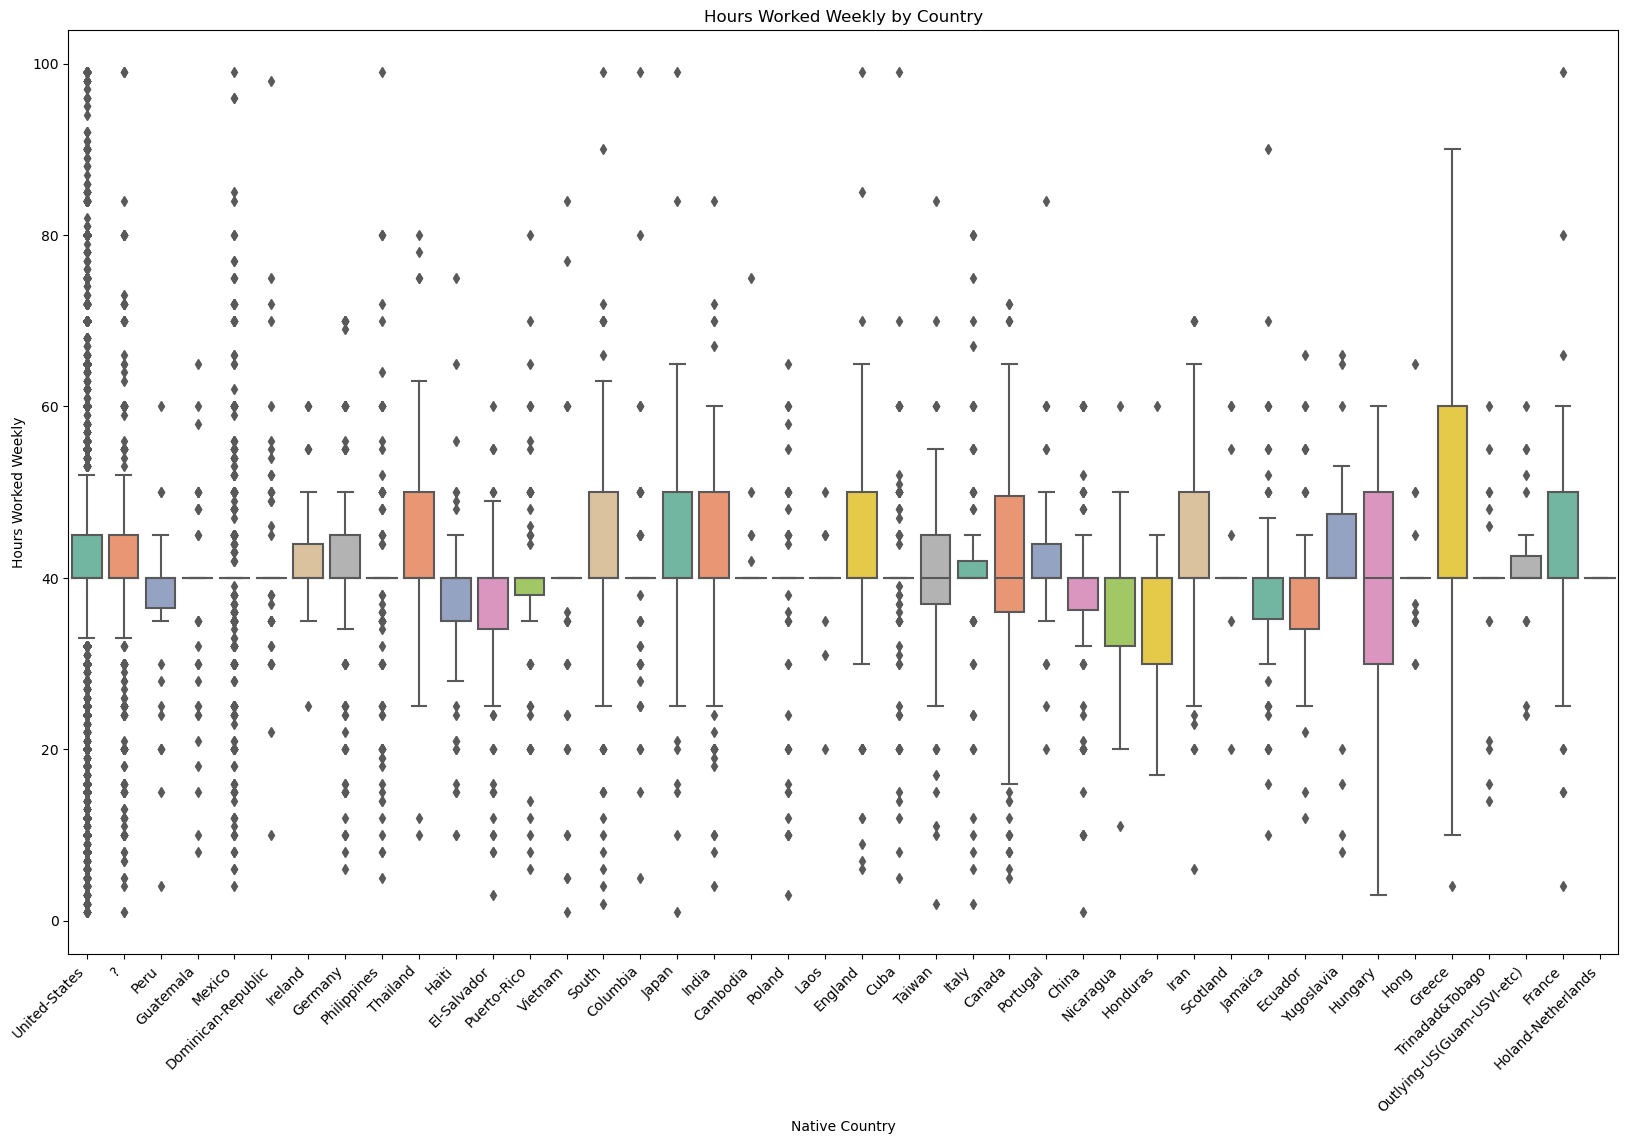

In [75]:
plot_data = df[['native-country', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(20, 12))
sns.boxplot(x='native-country', y='hours-per-week', data=plot_data, palette='Set2')
plt.title('Hours Worked Weekly by Country')
plt.xlabel('Native Country')
plt.ylabel('Hours Worked Weekly')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

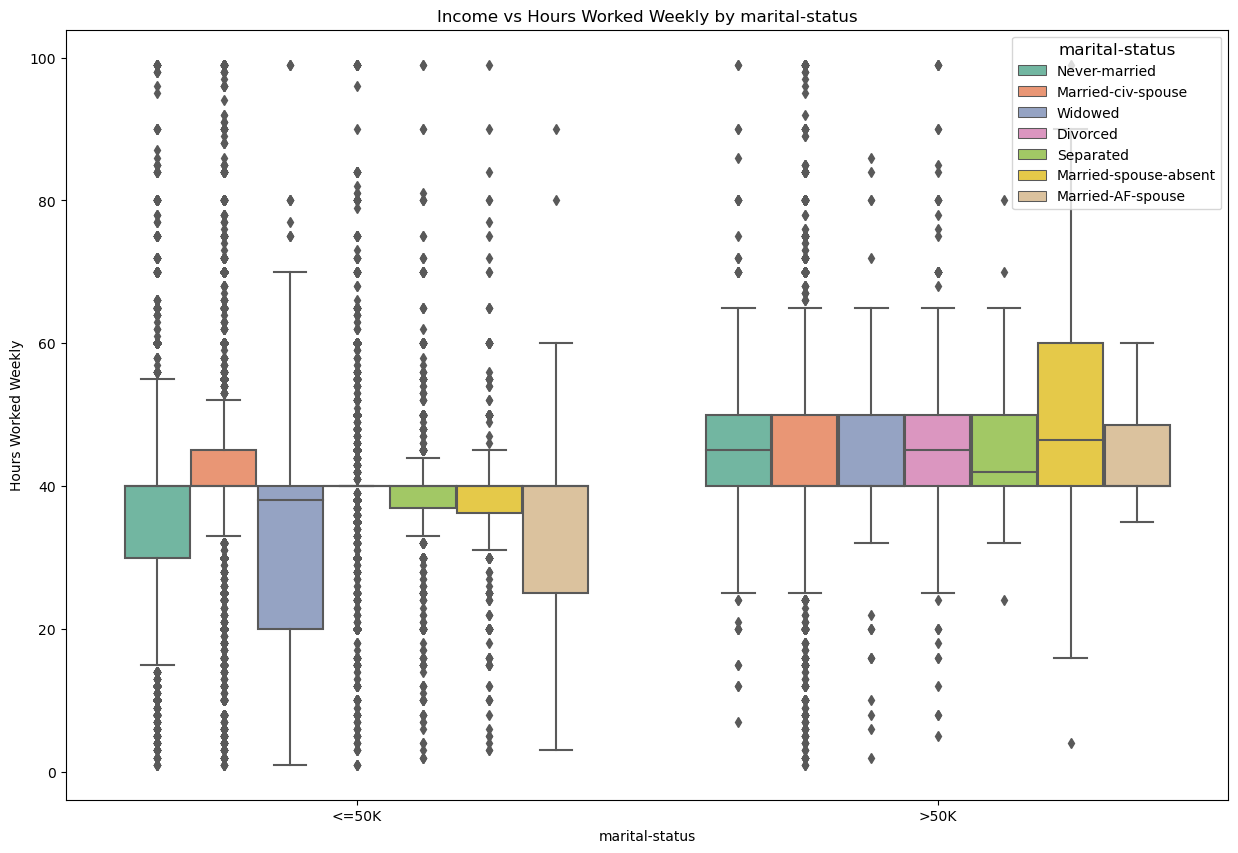

In [86]:
plot_data = df[['income', 'marital-status', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='income', y='hours-per-week', hue='marital-status', data=plot_data, order=['<=50K', '>50K'], palette='Set2')
plt.title('Income vs Hours Worked Weekly by marital-status')
plt.xlabel('marital-status')
plt.ylabel('Hours Worked Weekly')
plt.legend(title='marital-status', title_fontsize='12')
plt.show()

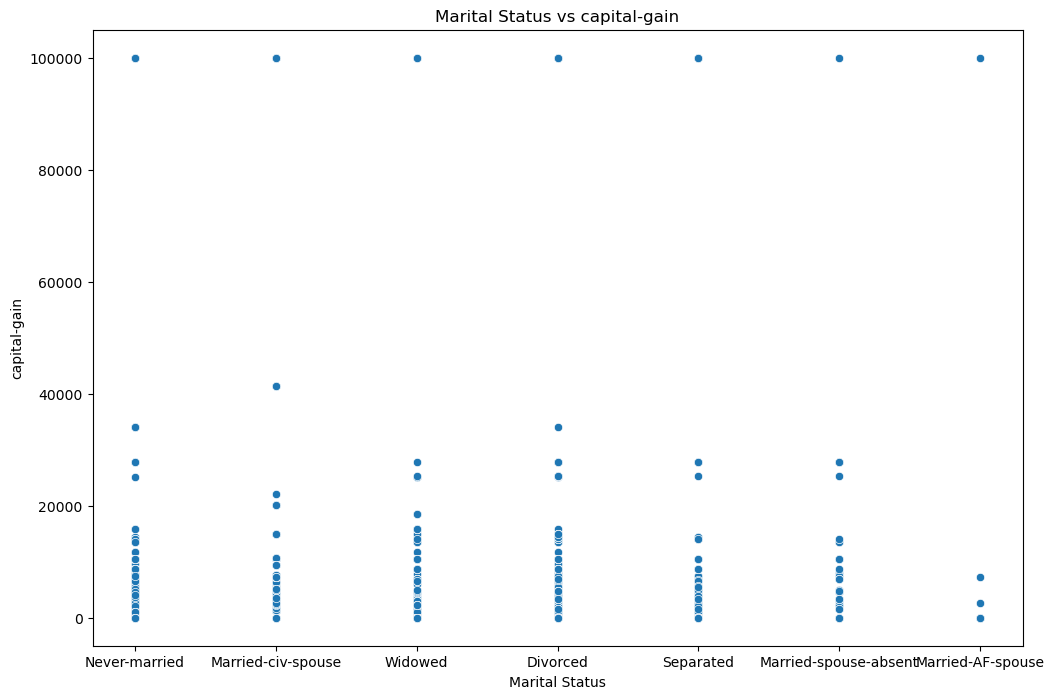

In [81]:
# Select relevant columns for the plot
plot_data = df[['marital-status', 'capital-gain']]

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='marital-status', y='capital-gain', data=plot_data)
plt.title('Marital Status vs capital-gain')
plt.xlabel('Marital Status')
plt.ylabel('capital-gain')
plt.show()

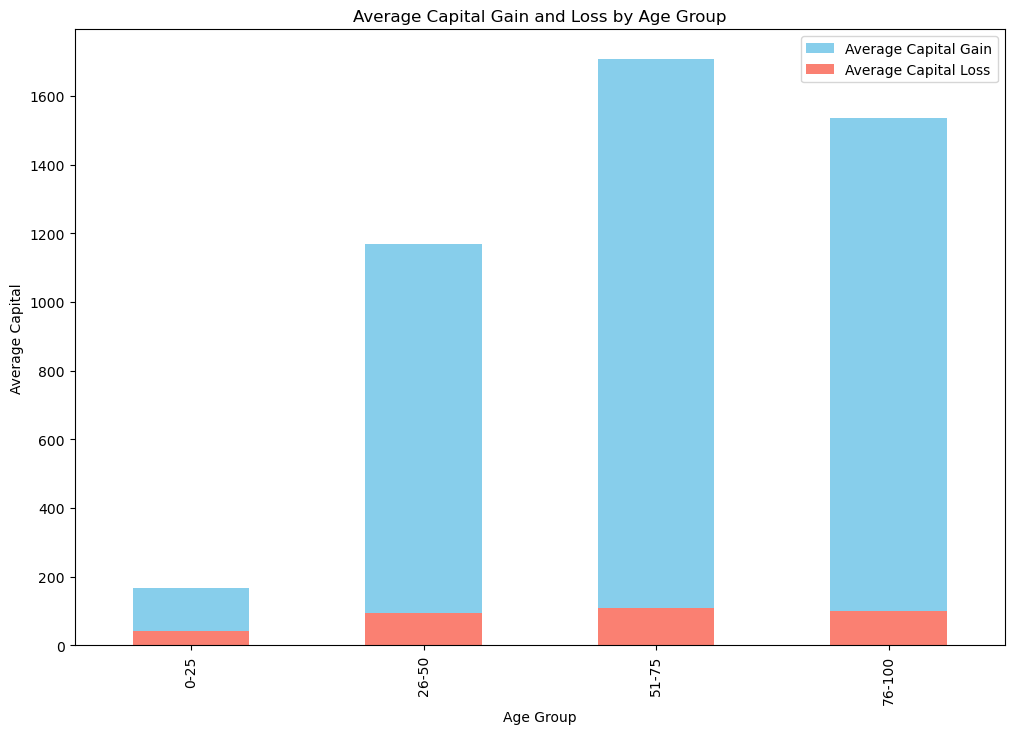

In [85]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 50, 75, 100], labels=['0-25', '26-50', '51-75', '76-100'])

# Calculate average capital gain and loss for each age group
avg_capital_gain = df.groupby('age_group')['capital-gain'].mean()
avg_capital_loss = df.groupby('age_group')['capital-loss'].mean()

# Plot bar chart
plt.figure(figsize=(12, 8))
avg_capital_gain.plot(kind='bar', color='skyblue', label='Average Capital Gain')
avg_capital_loss.plot(kind='bar', color='salmon', label='Average Capital Loss')
plt.title('Average Capital Gain and Loss by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Capital')
plt.legend()
plt.show()

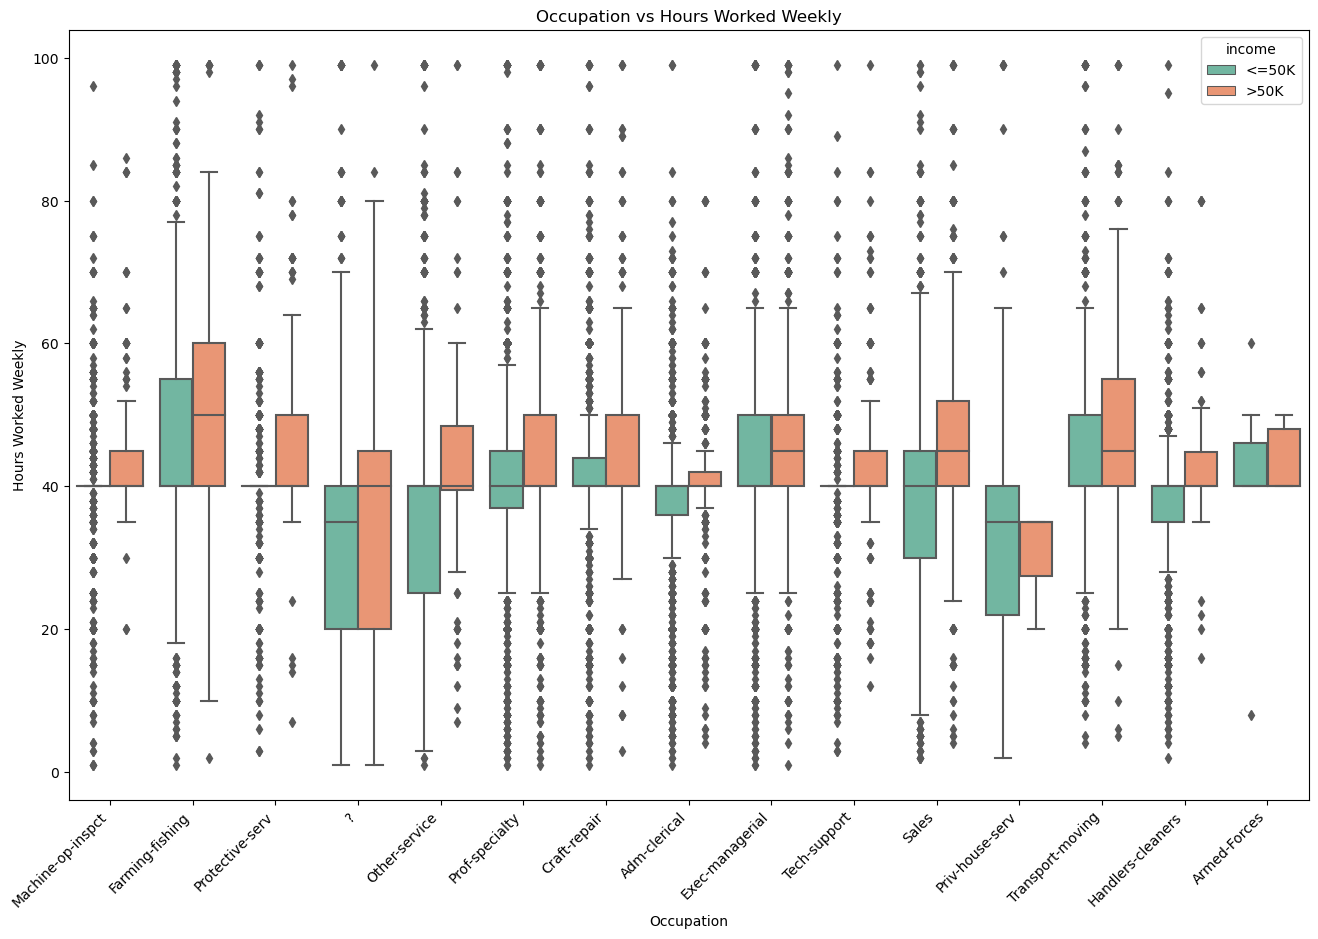

In [89]:
plot_data = df[['occupation', 'hours-per-week', 'income']]

# Create a box plot
plt.figure(figsize=(16, 10))
sns.boxplot(x='occupation', y='hours-per-week', hue='income', data=plot_data, palette='Set2')
plt.title('Occupation vs Hours Worked Weekly')
plt.xlabel('Occupation')
plt.ylabel('Hours Worked Weekly')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()